# Project Air Quality Prediction

# Author @ Siddhartha Sarkar

# Source of the Data

Dataset Source: collected from Indian Govt website.
Description of Data:
The real-time data as collected from the field instruments is displayed live without human intervention from CPCB. 
It is likely that the live data may display some errors or abnormal values. Any abnormal value may be due to any episode or instrumental error at any particular time.

It contains Real time National Air Quality Index values from different monitoring stations across India. 
The pollutants monitored are Sulphur Dioxide (SO2), Nitrogen Dioxide (NO2), Particulate Matter (PM10 and PM2.5) , Carbon Monoxide (CO), Ozone(O3) etc

# Import Necessary Libreries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import Dataset

In [2]:
air_data=pd.read_csv("./city_day.csv")
pollutant_data=pd.read_excel("./AirQuality.xlsx")

In [4]:
pollutant_data.head(10)

Country           State               city  \
0   India  Andhra_Pradesh          Amaravati   
1   India  Andhra_Pradesh          Amaravati   
2   India  Andhra_Pradesh          Amaravati   
3   India  Andhra_Pradesh          Amaravati   
4   India  Andhra_Pradesh          Amaravati   
5   India  Andhra_Pradesh          Amaravati   
6   India  Andhra_Pradesh          Amaravati   
7   India  Andhra_Pradesh  Rajamahendravaram   
8   India  Andhra_Pradesh  Rajamahendravaram   
9   India  Andhra_Pradesh  Rajamahendravaram   

                                            place           lastupdate   Avg  \
0                  Secretariat, Amaravati - APPCB  21-12-2018 03:00:00  70.0   
1                  Secretariat, Amaravati - APPCB  21-12-2018 03:00:00  76.0   
2                  Secretariat, Amaravati - APPCB  21-12-2018 03:00:00  73.0   
3                  Secretariat, Amaravati - APPCB  21-12-2018 03:00:00   5.0   
4                  Secretariat, Amaravati - APPCB  21-12-2018 03:00:00  41.0   
5                  Secretariat, Amaravati - APPCB  21-12-2018 03:00:00  44.0   
6                  Secretariat, Amaravati - APPCB  21-12-2018 03:00:00  29.0   
7  Anand Kala Kshetram, Rajamahendravaram - APPCB  21-12-2018 03:00:00   NaN   
8  Anand Kala Kshetram, Rajamahendravaram - APPCB  21-12-2018 03:00:00   NaN   
9  Anand Kala Kshetram, Rajamahendravaram - APPCB  21-12-2018 03:00:00   NaN   

     Max   Min Pollutants  
0  108.0  42.0      PM2.5  
1  102.0  43.0       PM10  
2  118.0  46.0        NO2  
3    6.0   4.0        NH3  
4  109.0   2.0        SO2  
5  102.0  18.0         CO  
6   35.0  12.0      OZONE  
7    NaN   NaN      PM2.5  
8    NaN   NaN       PM10  
9    NaN   NaN        NO2

# Data Understanding And Data Cleaning

In [5]:
pollutant_data.shape

(824, 9)

### Null Values treatments

In [6]:
pollutant_data.isna().sum()

Country        0
State          0
city           0
place          0
lastupdate     0
Avg           36
Max           36
Min           36
Pollutants     0
dtype: int64

## How to Show Only Null Values

In [7]:
pollutant_data[pollutant_data.isna().any(axis=1)]

Country           State               city  \
7     India  Andhra_Pradesh  Rajamahendravaram   
8     India  Andhra_Pradesh  Rajamahendravaram   
9     India  Andhra_Pradesh  Rajamahendravaram   
10    India  Andhra_Pradesh  Rajamahendravaram   
11    India  Andhra_Pradesh  Rajamahendravaram   
54    India           Delhi              Delhi   
55    India           Delhi              Delhi   
56    India           Delhi              Delhi   
57    India           Delhi              Delhi   
58    India           Delhi              Delhi   
217   India           Delhi              Delhi   
290   India         Gujarat          Ahmedabad   
296   India         Haryana           Gurugram   
297   India         Haryana           Gurugram   
298   India         Haryana           Gurugram   
299   India         Haryana           Gurugram   
300   India         Haryana           Gurugram   
342   India       Karnataka          Bengaluru   
343   India       Karnataka          Bengaluru   
344   India       Karnataka          Bengaluru   
345   India       Karnataka          Bengaluru   
346   India       Karnataka          Bengaluru   
453   India     Maharashtra         Chandrapur   
454   India     Maharashtra         Chandrapur   
455   India     Maharashtra         Chandrapur   
456   India     Maharashtra         Chandrapur   
457   India     Maharashtra         Chandrapur   
458   India     Maharashtra         Chandrapur   
505   India          Odisha            Talcher   
506   India          Odisha            Talcher   
591   India       Rajasthan             Jaipur   
677   India       Telangana          Hyderabad   
678   India       Telangana          Hyderabad   
679   India       Telangana          Hyderabad   
680   India       Telangana          Hyderabad   
681   India       Telangana          Hyderabad   

                                              place           lastupdate  Avg  \
7    Anand Kala Kshetram, Rajamahendravaram - APPCB  21-12-2018 03:00:00  NaN   
8    Anand Kala Kshetram, Rajamahendravaram - APPCB  21-12-2018 03:00:00  NaN   
9    Anand Kala Kshetram, Rajamahendravaram - APPCB  21-12-2018 03:00:00  NaN   
10   Anand Kala Kshetram, Rajamahendravaram - APPCB  21-12-2018 03:00:00  NaN   
11   Anand Kala Kshetram, Rajamahendravaram - APPCB  21-12-2018 03:00:00  NaN   
54                        Anand Vihar, Delhi - DPCC  21-12-2018 03:00:00  NaN   
55                        Anand Vihar, Delhi - DPCC  21-12-2018 03:00:00  NaN   
56                        Anand Vihar, Delhi - DPCC  21-12-2018 03:00:00  NaN   
57                        Anand Vihar, Delhi - DPCC  21-12-2018 03:00:00  NaN   
58                        Anand Vihar, Delhi - DPCC  21-12-2018 03:00:00  NaN   
217                      Punjabi Bagh, Delhi - DPCC  21-12-2018 03:00:00  NaN   
290                     Maninagar, Ahmedabad - GPCB  21-12-2018 03:00:00  NaN   
296                NISE Gwal Pahari, Gurugram - IMD  21-12-2018 03:00:00  NaN   
297                NISE Gwal Pahari, Gurugram - IMD  21-12-2018 03:00:00  NaN   
298                NISE Gwal Pahari, Gurugram - IMD  21-12-2018 03:00:00  NaN   
299                NISE Gwal Pahari, Gurugram - IMD  21-12-2018 03:00:00  NaN   
300                NISE Gwal Pahari, Gurugram - IMD  21-12-2018 03:00:00  NaN   
342                       Hebbal, Bengaluru - KSPCB  21-12-2018 03:00:00  NaN   
343                       Hebbal, Bengaluru - KSPCB  21-12-2018 03:00:00  NaN   
344                       Hebbal, Bengaluru - KSPCB  21-12-2018 03:00:00  NaN   
345                       Hebbal, Bengaluru - KSPCB  21-12-2018 03:00:00  NaN   
346                       Hebbal, Bengaluru - KSPCB  21-12-2018 03:00:00  NaN   
453                 MIDC Khutala, Chandrapur - MPCB  21-12-2018 03:00:00  NaN   
454                 MIDC Khutala, Chandrapur - MPCB  21-12-2018 03:00:00  NaN   
455                 MIDC Khutala, Chandrapur - MPCB  21-12-2018 03:00:00  NaN   
456                 MIDC Khutala, Chandrapur - 

In [8]:
pollutant_data[pollutant_data.city=="Rajamahendravaram"]

Country           State               city  \
7    India  Andhra_Pradesh  Rajamahendravaram   
8    India  Andhra_Pradesh  Rajamahendravaram   
9    India  Andhra_Pradesh  Rajamahendravaram   
10   India  Andhra_Pradesh  Rajamahendravaram   
11   India  Andhra_Pradesh  Rajamahendravaram   
12   India  Andhra_Pradesh  Rajamahendravaram   
13   India  Andhra_Pradesh  Rajamahendravaram   

                                             place           lastupdate  \
7   Anand Kala Kshetram, Rajamahendravaram - APPCB  21-12-2018 03:00:00   
8   Anand Kala Kshetram, Rajamahendravaram - APPCB  21-12-2018 03:00:00   
9   Anand Kala Kshetram, Rajamahendravaram - APPCB  21-12-2018 03:00:00   
10  Anand Kala Kshetram, Rajamahendravaram - APPCB  21-12-2018 03:00:00   
11  Anand Kala Kshetram, Rajamahendravaram - APPCB  21-12-2018 03:00:00   
12  Anand Kala Kshetram, Rajamahendravaram - APPCB  21-12-2018 03:00:00   
13  Anand Kala Kshetram, Rajamahendravaram - APPCB  21-12-2018 03:00:00   

      Avg    Max   Min Pollutants  
7     NaN    NaN   NaN      PM2.5  
8     NaN    NaN   NaN       PM10  
9     NaN    NaN   NaN        NO2  
10    NaN    NaN   NaN        NH3  
11    NaN    NaN   NaN        SO2  
12   30.0  103.0   2.0         CO  
13  108.0  130.0  51.0      OZONE

In [9]:
Rajamahendravaram_mean=pollutant_data[pollutant_data.city=="Rajamahendravaram"].aggregate('mean')
Rajamahendravaram_mean

C:\Users\Siddhartha-PC\AppData\Local\Temp\ipykernel_19056\407631489.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  Rajamahendravaram_mean=pollutant_data[pollutant_data.city=="Rajamahendravaram"].aggregate('mean')


Avg     69.0
Max    116.5
Min     26.5
dtype: float64

In [10]:
pollutant_data[pollutant_data.city=="Rajamahendravaram"]=pollutant_data[pollutant_data.city=="Rajamahendravaram"].replace(np.NaN,Rajamahendravaram_mean)

In [11]:
pollutant_data[pollutant_data.city=="Rajamahendravaram"]

Country           State               city  \
7    India  Andhra_Pradesh  Rajamahendravaram   
8    India  Andhra_Pradesh  Rajamahendravaram   
9    India  Andhra_Pradesh  Rajamahendravaram   
10   India  Andhra_Pradesh  Rajamahendravaram   
11   India  Andhra_Pradesh  Rajamahendravaram   
12   India  Andhra_Pradesh  Rajamahendravaram   
13   India  Andhra_Pradesh  Rajamahendravaram   

                                             place           lastupdate  \
7   Anand Kala Kshetram, Rajamahendravaram - APPCB  21-12-2018 03:00:00   
8   Anand Kala Kshetram, Rajamahendravaram - APPCB  21-12-2018 03:00:00   
9   Anand Kala Kshetram, Rajamahendravaram - APPCB  21-12-2018 03:00:00   
10  Anand Kala Kshetram, Rajamahendravaram - APPCB  21-12-2018 03:00:00   
11  Anand Kala Kshetram, Rajamahendravaram - APPCB  21-12-2018 03:00:00   
12  Anand Kala Kshetram, Rajamahendravaram - APPCB  21-12-2018 03:00:00   
13  Anand Kala Kshetram, Rajamahendravaram - APPCB  21-12-2018 03:00:00   

      Avg    Max   Min Pollutants  
7    69.0  116.5  26.5      PM2.5  
8    69.0  116.5  26.5       PM10  
9    69.0  116.5  26.5        NO2  
10   69.0  116.5  26.5        NH3  
11   69.0  116.5  26.5        SO2  
12   30.0  103.0   2.0         CO  
13  108.0  130.0  51.0      OZONE

In [12]:
pollutant_data[pollutant_data.isna().any(axis=1)]

Country        State        city                                   place  \
54    India        Delhi       Delhi               Anand Vihar, Delhi - DPCC   
55    India        Delhi       Delhi               Anand Vihar, Delhi - DPCC   
56    India        Delhi       Delhi               Anand Vihar, Delhi - DPCC   
57    India        Delhi       Delhi               Anand Vihar, Delhi - DPCC   
58    India        Delhi       Delhi               Anand Vihar, Delhi - DPCC   
217   India        Delhi       Delhi              Punjabi Bagh, Delhi - DPCC   
290   India      Gujarat   Ahmedabad             Maninagar, Ahmedabad - GPCB   
296   India      Haryana    Gurugram        NISE Gwal Pahari, Gurugram - IMD   
297   India      Haryana    Gurugram        NISE Gwal Pahari, Gurugram - IMD   
298   India      Haryana    Gurugram        NISE Gwal Pahari, Gurugram - IMD   
299   India      Haryana    Gurugram        NISE Gwal Pahari, Gurugram - IMD   
300   India      Haryana    Gurugram        NISE Gwal Pahari, Gurugram - IMD   
342   India    Karnataka   Bengaluru               Hebbal, Bengaluru - KSPCB   
343   India    Karnataka   Bengaluru               Hebbal, Bengaluru - KSPCB   
344   India    Karnataka   Bengaluru               Hebbal, Bengaluru - KSPCB   
345   India    Karnataka   Bengaluru               Hebbal, Bengaluru - KSPCB   
346   India    Karnataka   Bengaluru               Hebbal, Bengaluru - KSPCB   
453   India  Maharashtra  Chandrapur         MIDC Khutala, Chandrapur - MPCB   
454   India  Maharashtra  Chandrapur         MIDC Khutala, Chandrapur - MPCB   
455   India  Maharashtra  Chandrapur         MIDC Khutala, Chandrapur - MPCB   
456   India  Maharashtra  Chandrapur         MIDC Khutala, Chandrapur - MPCB   
457   India  Maharashtra  Chandrapur         MIDC Khutala, Chandrapur - MPCB   
458   India  Maharashtra  Chandrapur         MIDC Khutala, Chandrapur - MPCB   
505   India       Odisha     Talcher      Talcher Coalfields,Talcher - OSPCB   
506   India       Odisha     Talcher      Talcher Coalfields,Talcher - OSPCB   
591   India    Rajasthan      Jaipur  Police Commissionerate, Jaipur - RSPCB   
677   India    Telangana   Hyderabad             Zoo Park, Hyderabad - TSPCB   
678   India    Telangana   Hyderabad             Zoo Park, Hyderabad - TSPCB   
679   India    Telangana   Hyderabad             Zoo Park, Hyderabad - TSPCB   
680   India    Telangana   Hyderabad             Zoo Park, Hyderabad - TSPCB   
681   India    Telangana   Hyderabad             Zoo Park, Hyderabad - TSPCB   

              lastupdate  Avg  Max  Min Pollutants  
54   21-12-2018 03:00:00  NaN  NaN  NaN      PM2.5  
55   21-12-2018 03:00:00  NaN  NaN  NaN       PM10  
56   21-12-2018 03:00:00  NaN  NaN  NaN        NO2  
57   21-12-2018 03:00:00  NaN  NaN  NaN        NH3  
58   21-12-2018 03:00:00  NaN  NaN  NaN        SO2  
217  21-12-2018 03:00:00  NaN  NaN  NaN        SO2  
290  21-12-2018 03:00:00  NaN  NaN  NaN      OZONE  
296  21-12-2018 03:00:00  NaN  NaN  NaN      PM2.5  
297  21-12-2018 03:00:00  NaN  NaN  NaN       PM10  
298  21-12-2018 03:00:00  NaN  NaN  NaN        NO2  
299  21-12-2018 03:00:00  NaN  NaN  NaN         CO  
300  21-12-2018 03:00:00  NaN  NaN  NaN      OZONE  
342  21-12-2018 03:00:00  NaN  NaN  NaN      PM2.5  
343  21-12-2018 03:00:00  NaN  NaN  NaN       PM10  
344  21-12-2018 03:00:00  NaN  NaN  NaN        NO2  
345  21-12-2018 03:00:00  NaN  NaN  NaN        NH3  
346  21-12-2018 03:00:00  NaN  NaN  NaN        SO2  
453  21-12-2018 03:00:00  NaN  NaN  NaN      PM2.5  
454  21-12-2018 03:00:00  NaN  NaN  NaN       PM10  
455  21-12-2018 03:00:00  NaN  NaN  NaN        NO2  
456  21-12-2018 03:00:00  NaN  NaN  NaN        NH3  
457  21-12-2018 03:00:00  NaN  NaN  NaN        SO2  
458  21-12-2018 03:00:00  NaN  NaN  NaN         CO  
505  21-12-2018 03:00:00  NaN  NaN  NaN      PM2.5  
506  21-12-2018 03:00:00  NaN  NaN  NaN        NO2  
591  21-12-2018 03:00:00  NaN  NaN  NaN        NH3  
677  21-12-2

In [13]:
pollutant_data[(pollutant_data.city=="Delhi") & (pollutant_data.isna().any(axis=1))]

Country  State   city                       place           lastupdate  \
54    India  Delhi  Delhi   Anand Vihar, Delhi - DPCC  21-12-2018 03:00:00   
55    India  Delhi  Delhi   Anand Vihar, Delhi - DPCC  21-12-2018 03:00:00   
56    India  Delhi  Delhi   Anand Vihar, Delhi - DPCC  21-12-2018 03:00:00   
57    India  Delhi  Delhi   Anand Vihar, Delhi - DPCC  21-12-2018 03:00:00   
58    India  Delhi  Delhi   Anand Vihar, Delhi - DPCC  21-12-2018 03:00:00   
217   India  Delhi  Delhi  Punjabi Bagh, Delhi - DPCC  21-12-2018 03:00:00   

     Avg  Max  Min Pollutants  
54   NaN  NaN  NaN      PM2.5  
55   NaN  NaN  NaN       PM10  
56   NaN  NaN  NaN        NO2  
57   NaN  NaN  NaN        NH3  
58   NaN  NaN  NaN        SO2  
217  NaN  NaN  NaN        SO2

In [14]:
Delhi_mean=pollutant_data[pollutant_data.city=="Delhi"].aggregate('mean')
Delhi_mean

C:\Users\Siddhartha-PC\AppData\Local\Temp\ipykernel_19056\316482715.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  Delhi_mean=pollutant_data[pollutant_data.city=="Delhi"].aggregate('mean')


Avg    139.072961
Max    195.892704
Min     80.339056
dtype: float64

In [15]:
pollutant_data[pollutant_data.city=="Delhi"]=pollutant_data[pollutant_data.city=="Delhi"].replace(np.NaN,Delhi_mean)

In [16]:
pollutant_data[(pollutant_data.city=="Delhi") & (pollutant_data.isna().any(axis=1))]

Empty DataFrame
Columns: [Country, State, city, place, lastupdate, Avg, Max, Min, Pollutants]
Index: []

In [17]:
pollutant_data[(pollutant_data.city=="Gurugram") & (pollutant_data.isna().any(axis=1))]

Country    State      city                             place  \
296   India  Haryana  Gurugram  NISE Gwal Pahari, Gurugram - IMD   
297   India  Haryana  Gurugram  NISE Gwal Pahari, Gurugram - IMD   
298   India  Haryana  Gurugram  NISE Gwal Pahari, Gurugram - IMD   
299   India  Haryana  Gurugram  NISE Gwal Pahari, Gurugram - IMD   
300   India  Haryana  Gurugram  NISE Gwal Pahari, Gurugram - IMD   

              lastupdate  Avg  Max  Min Pollutants  
296  21-12-2018 03:00:00  NaN  NaN  NaN      PM2.5  
297  21-12-2018 03:00:00  NaN  NaN  NaN       PM10  
298  21-12-2018 03:00:00  NaN  NaN  NaN        NO2  
299  21-12-2018 03:00:00  NaN  NaN  NaN         CO  
300  21-12-2018 03:00:00  NaN  NaN  NaN      OZONE

In [18]:
Gurugram_mean=pollutant_data[pollutant_data.city=="Gurugram"].aggregate('mean')
Gurugram_mean

C:\Users\Siddhartha-PC\AppData\Local\Temp\ipykernel_19056\4289819133.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  Gurugram_mean=pollutant_data[pollutant_data.city=="Gurugram"].aggregate('mean')


Avg     88.8
Max    156.2
Min     36.2
dtype: float64

In [19]:
pollutant_data[pollutant_data.city=="Gurugram"]=pollutant_data[pollutant_data.city=="Gurugram"].replace(np.NaN,Gurugram_mean)

In [20]:
pollutant_data[(pollutant_data.city=="Bengaluru") & (pollutant_data.isna().any(axis=1))]

Country      State       city                      place  \
342   India  Karnataka  Bengaluru  Hebbal, Bengaluru - KSPCB   
343   India  Karnataka  Bengaluru  Hebbal, Bengaluru - KSPCB   
344   India  Karnataka  Bengaluru  Hebbal, Bengaluru - KSPCB   
345   India  Karnataka  Bengaluru  Hebbal, Bengaluru - KSPCB   
346   India  Karnataka  Bengaluru  Hebbal, Bengaluru - KSPCB   

              lastupdate  Avg  Max  Min Pollutants  
342  21-12-2018 03:00:00  NaN  NaN  NaN      PM2.5  
343  21-12-2018 03:00:00  NaN  NaN  NaN       PM10  
344  21-12-2018 03:00:00  NaN  NaN  NaN        NO2  
345  21-12-2018 03:00:00  NaN  NaN  NaN        NH3  
346  21-12-2018 03:00:00  NaN  NaN  NaN        SO2

In [21]:
Bengaluru_mean=pollutant_data[pollutant_data.city=="Bengaluru"].aggregate('mean')
Bengaluru_mean

C:\Users\Siddhartha-PC\AppData\Local\Temp\ipykernel_19056\1830855047.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  Bengaluru_mean=pollutant_data[pollutant_data.city=="Bengaluru"].aggregate('mean')


Avg    56.382979
Max    89.510638
Min    25.191489
dtype: float64

In [22]:
pollutant_data[pollutant_data.city=="Bengaluru"]=pollutant_data[pollutant_data.city=="Bengaluru"].replace(np.NaN,Bengaluru_mean)  

In [23]:
pollutant_data[pollutant_data.isna().any(axis=1)]

Country        State        city                                   place  \
290   India      Gujarat   Ahmedabad             Maninagar, Ahmedabad - GPCB   
453   India  Maharashtra  Chandrapur         MIDC Khutala, Chandrapur - MPCB   
454   India  Maharashtra  Chandrapur         MIDC Khutala, Chandrapur - MPCB   
455   India  Maharashtra  Chandrapur         MIDC Khutala, Chandrapur - MPCB   
456   India  Maharashtra  Chandrapur         MIDC Khutala, Chandrapur - MPCB   
457   India  Maharashtra  Chandrapur         MIDC Khutala, Chandrapur - MPCB   
458   India  Maharashtra  Chandrapur         MIDC Khutala, Chandrapur - MPCB   
505   India       Odisha     Talcher      Talcher Coalfields,Talcher - OSPCB   
506   India       Odisha     Talcher      Talcher Coalfields,Talcher - OSPCB   
591   India    Rajasthan      Jaipur  Police Commissionerate, Jaipur - RSPCB   
677   India    Telangana   Hyderabad             Zoo Park, Hyderabad - TSPCB   
678   India    Telangana   Hyderabad             Zoo Park, Hyderabad - TSPCB   
679   India    Telangana   Hyderabad             Zoo Park, Hyderabad - TSPCB   
680   India    Telangana   Hyderabad             Zoo Park, Hyderabad - TSPCB   
681   India    Telangana   Hyderabad             Zoo Park, Hyderabad - TSPCB   

              lastupdate  Avg  Max  Min Pollutants  
290  21-12-2018 03:00:00  NaN  NaN  NaN      OZONE  
453  21-12-2018 03:00:00  NaN  NaN  NaN      PM2.5  
454  21-12-2018 03:00:00  NaN  NaN  NaN       PM10  
455  21-12-2018 03:00:00  NaN  NaN  NaN        NO2  
456  21-12-2018 03:00:00  NaN  NaN  NaN        NH3  
457  21-12-2018 03:00:00  NaN  NaN  NaN        SO2  
458  21-12-2018 03:00:00  NaN  NaN  NaN         CO  
505  21-12-2018 03:00:00  NaN  NaN  NaN      PM2.5  
506  21-12-2018 03:00:00  NaN  NaN  NaN        NO2  
591  21-12-2018 03:00:00  NaN  NaN  NaN        NH3  
677  21-12-2018 03:00:00  NaN  NaN  NaN      PM2.5  
678  21-12-2018 03:00:00  NaN  NaN  NaN       PM10  
679  21-12-2018 03:00:00  NaN  NaN  NaN        NO2  
680  21-12-2018 03:00:00  NaN  NaN  NaN        NH3  
681  21-12-2018 03:00:00  NaN  NaN  NaN        SO2

In [24]:
pollutant_data[(pollutant_data.city=="Chandrapur") & (pollutant_data.isna().any(axis=1))]

Country        State        city                            place  \
453   India  Maharashtra  Chandrapur  MIDC Khutala, Chandrapur - MPCB   
454   India  Maharashtra  Chandrapur  MIDC Khutala, Chandrapur - MPCB   
455   India  Maharashtra  Chandrapur  MIDC Khutala, Chandrapur - MPCB   
456   India  Maharashtra  Chandrapur  MIDC Khutala, Chandrapur - MPCB   
457   India  Maharashtra  Chandrapur  MIDC Khutala, Chandrapur - MPCB   
458   India  Maharashtra  Chandrapur  MIDC Khutala, Chandrapur - MPCB   

              lastupdate  Avg  Max  Min Pollutants  
453  21-12-2018 03:00:00  NaN  NaN  NaN      PM2.5  
454  21-12-2018 03:00:00  NaN  NaN  NaN       PM10  
455  21-12-2018 03:00:00  NaN  NaN  NaN        NO2  
456  21-12-2018 03:00:00  NaN  NaN  NaN        NH3  
457  21-12-2018 03:00:00  NaN  NaN  NaN        SO2  
458  21-12-2018 03:00:00  NaN  NaN  NaN         CO

In [25]:
Chandrapur_mean=pollutant_data[pollutant_data.city=="Chandrapur"].aggregate('mean')
Chandrapur_mean

C:\Users\Siddhartha-PC\AppData\Local\Temp\ipykernel_19056\2036311318.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  Chandrapur_mean=pollutant_data[pollutant_data.city=="Chandrapur"].aggregate('mean')


Avg    41.285714
Max    83.428571
Min    22.428571
dtype: float64

In [26]:
pollutant_data[pollutant_data.city=="Chandrapur"]=pollutant_data[pollutant_data.city=="Chandrapur"].replace(np.NaN,Chandrapur_mean)  

In [27]:
pollutant_data[pollutant_data.isna().any(axis=1)]

Country      State       city                                   place  \
290   India    Gujarat  Ahmedabad             Maninagar, Ahmedabad - GPCB   
505   India     Odisha    Talcher      Talcher Coalfields,Talcher - OSPCB   
506   India     Odisha    Talcher      Talcher Coalfields,Talcher - OSPCB   
591   India  Rajasthan     Jaipur  Police Commissionerate, Jaipur - RSPCB   
677   India  Telangana  Hyderabad             Zoo Park, Hyderabad - TSPCB   
678   India  Telangana  Hyderabad             Zoo Park, Hyderabad - TSPCB   
679   India  Telangana  Hyderabad             Zoo Park, Hyderabad - TSPCB   
680   India  Telangana  Hyderabad             Zoo Park, Hyderabad - TSPCB   
681   India  Telangana  Hyderabad             Zoo Park, Hyderabad - TSPCB   

              lastupdate  Avg  Max  Min Pollutants  
290  21-12-2018 03:00:00  NaN  NaN  NaN      OZONE  
505  21-12-2018 03:00:00  NaN  NaN  NaN      PM2.5  
506  21-12-2018 03:00:00  NaN  NaN  NaN        NO2  
591  21-12-2018 03:00:00  NaN  NaN  NaN        NH3  
677  21-12-2018 03:00:00  NaN  NaN  NaN      PM2.5  
678  21-12-2018 03:00:00  NaN  NaN  NaN       PM10  
679  21-12-2018 03:00:00  NaN  NaN  NaN        NO2  
680  21-12-2018 03:00:00  NaN  NaN  NaN        NH3  
681  21-12-2018 03:00:00  NaN  NaN  NaN        SO2

In [28]:
pollutant_data=pollutant_data.dropna()

In [29]:
pollutant_data[pollutant_data.isna().any(axis=1)]

Empty DataFrame
Columns: [Country, State, city, place, lastupdate, Avg, Max, Min, Pollutants]
Index: []

In [30]:
pollutant_data.head()

Country           State       city                           place  \
0   India  Andhra_Pradesh  Amaravati  Secretariat, Amaravati - APPCB   
1   India  Andhra_Pradesh  Amaravati  Secretariat, Amaravati - APPCB   
2   India  Andhra_Pradesh  Amaravati  Secretariat, Amaravati - APPCB   
3   India  Andhra_Pradesh  Amaravati  Secretariat, Amaravati - APPCB   
4   India  Andhra_Pradesh  Amaravati  Secretariat, Amaravati - APPCB   

            lastupdate   Avg    Max   Min Pollutants  
0  21-12-2018 03:00:00  70.0  108.0  42.0      PM2.5  
1  21-12-2018 03:00:00  76.0  102.0  43.0       PM10  
2  21-12-2018 03:00:00  73.0  118.0  46.0        NO2  
3  21-12-2018 03:00:00   5.0    6.0   4.0        NH3  
4  21-12-2018 03:00:00  41.0  109.0   2.0        SO2

### Outliers treatments

<AxesSubplot:>

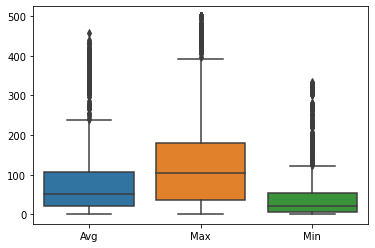

In [31]:
sns.boxplot(data=pollutant_data)

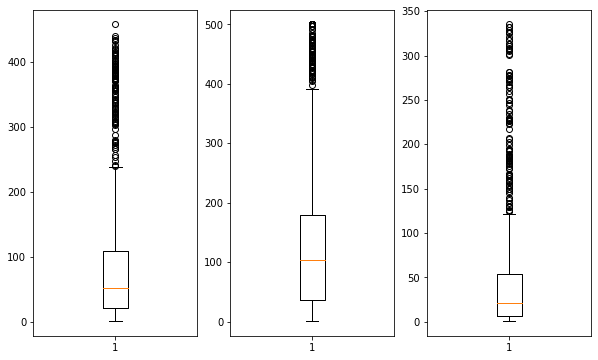

In [32]:
plt.figure(figsize=(10,6))
plt.subplot(1,3,1)
plt.boxplot("Avg",data=pollutant_data)
plt.subplot(1,3,2)
plt.boxplot("Max",data=pollutant_data)
plt.subplot(1,3,3)
plt.boxplot("Min",data=pollutant_data)
plt.show()


In [33]:
q1,q3=np.percentile(pollutant_data["Avg"],[25,75])
iqr=q3-q1
upper=q3+(iqr)*1.5
pollutant_data["Avg"]=pollutant_data["Avg"].clip(upper=upper)

In [34]:
q1,q3=np.percentile(pollutant_data["Max"],[25,75])
iqr=q3-q1
upper=q3+(iqr)*1.5
pollutant_data["Max"]=pollutant_data["Max"].clip(upper=upper)

In [35]:
q1,q3=np.percentile(pollutant_data["Min"],[25,75])
iqr=q3-q1
upper=q3+(iqr)*1.5
pollutant_data["Min"]=pollutant_data["Min"].clip(upper=upper)

<AxesSubplot:>

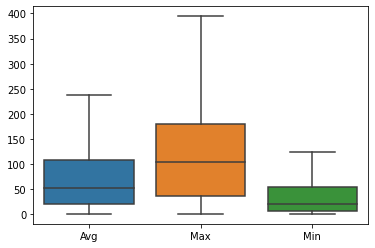

In [36]:
sns.boxplot(data=pollutant_data)

In [37]:
pollutant_data.head()

Country           State       city                           place  \
0   India  Andhra_Pradesh  Amaravati  Secretariat, Amaravati - APPCB   
1   India  Andhra_Pradesh  Amaravati  Secretariat, Amaravati - APPCB   
2   India  Andhra_Pradesh  Amaravati  Secretariat, Amaravati - APPCB   
3   India  Andhra_Pradesh  Amaravati  Secretariat, Amaravati - APPCB   
4   India  Andhra_Pradesh  Amaravati  Secretariat, Amaravati - APPCB   

            lastupdate   Avg    Max   Min Pollutants  
0  21-12-2018 03:00:00  70.0  108.0  42.0      PM2.5  
1  21-12-2018 03:00:00  76.0  102.0  43.0       PM10  
2  21-12-2018 03:00:00  73.0  118.0  46.0        NO2  
3  21-12-2018 03:00:00   5.0    6.0   4.0        NH3  
4  21-12-2018 03:00:00  41.0  109.0   2.0        SO2

# EDA

In [38]:
pollutant_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 815 entries, 0 to 823
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Country     815 non-null    object 
 1   State       815 non-null    object 
 2   city        815 non-null    object 
 3   place       815 non-null    object 
 4   lastupdate  815 non-null    object 
 5   Avg         815 non-null    float64
 6   Max         815 non-null    float64
 7   Min         815 non-null    float64
 8   Pollutants  815 non-null    object 
dtypes: float64(3), object(6)
memory usage: 63.7+ KB


In [39]:
pollutant_data["Pollutants"].value_counts()

CO       128
NO2      127
PM2.5    125
SO2      120
OZONE    118
PM10     107
NH3       90
Name: Pollutants, dtype: int64

In [40]:
pollutant_data["Pollutants"].unique()

array(['PM2.5', 'PM10', 'NO2', 'NH3', 'SO2', 'CO', 'OZONE'], dtype=object)

In [41]:
pollutant_data["Pollutants"]

0      PM2.5
1       PM10
2        NO2
3        NH3
4        SO2
       ...  
819      NO2
820      NH3
821      SO2
822       CO
823    OZONE
Name: Pollutants, Length: 815, dtype: object

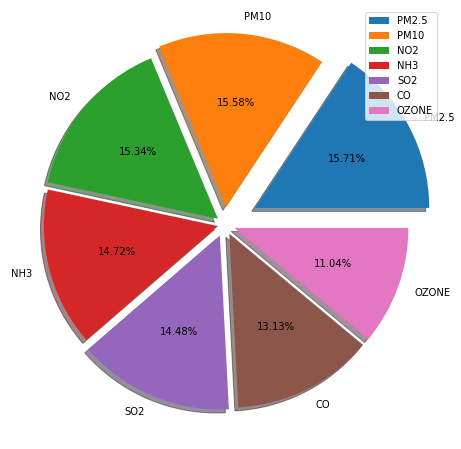

In [42]:
plt.figure(figsize=(10,8))
plt.pie(x=pollutant_data["Pollutants"].value_counts(),explode=[0.2,0.1,0.05,0.04,0.07,0.06,0.06],labels=pollutant_data["Pollutants"].unique(),
        colors=None,autopct="%1.2f%%",shadow=True,wedgeprops=None,textprops=None,
    )
plt.legend()
plt.show()

In [43]:
from plotly import tools
import plotly.graph_objs as go
from plotly.offline import iplot
#init_notebook_mode(connected = True)

In [44]:
pollutant_data["Pollutants"]

0      PM2.5
1       PM10
2        NO2
3        NH3
4        SO2
       ...  
819      NO2
820      NH3
821      SO2
822       CO
823    OZONE
Name: Pollutants, Length: 815, dtype: object

In [45]:
import plotly.graph_objs as go
label =pollutant_data["Pollutants"].unique()
val = pollutant_data["Pollutants"].value_counts()
percent = [15.71, 15.58, 15.34, 14.72, 14.48, 13.13, 11.04]
import plotly.graph_objs as go
data1 = {
   "values": val,
   "labels": label,
   "domain": {"column": 0},
   "name":"Pollutants" ,
   "hoverinfo":"label+percent",
   "hole": .4,
   "type": "pie"
}
data = [data1]
layout = go.Layout(
   {
      "title":"Different Types of Pollutants in the Air",
      "grid": {"rows": 1, "columns": 1},
      "annotations": [
         {
            "font": {
               "size": 20
            },
            "showarrow": False,
            "text": "Pollutants",
            "x": 0.50,
            "y": 0.5
         }]})
      


fig = go.Figure(data = data, layout = layout)
iplot(fig)

In [46]:
import plotly.graph_objs as go
parties = ['BJP', 'CONGRESS', 'DMK', 'TMC', 'YSRC', 'SS', 'JDU','BJD', 'BSP','OTH']
seats = [303,52,23,22,22,18,16,12,10, 65]
percent = [37.36, 19.49, 2.26, 4.07, 2.53, 2.10, 1.46, 1.66, 3.63, 25.44]
import plotly.graph_objs as go
data1 = {
   "values": seats,
   "labels": parties,
   "domain": {"column": 0},
   "name": "seats",
   "hoverinfo":"label+percent+name",
   "hole": .4,
   "type": "pie"
}
data2 = {
   "values": percent,
   "labels": parties,
   "domain": {"column": 1},
   "name": "vote share",
   "hoverinfo":"label+percent+name",
   "hole": .4,
   "type": "pie"
}
data = [data1,data2]
layout = go.Layout(
   {
      "title":"Parliamentary Election 2019",
      "grid": {"rows": 1, "columns": 2},
      "annotations": [
         {
            "font": {
               "size": 20
            },
            "showarrow": False,
            "text": "seats",
            "x": 0.20,
            "y": 0.5
         },
         {
            "font": {
               "size": 20
            },
            "showarrow": False,
            "text": "votes",
            "x": 0.8,
            "y": 0.5
         }
      ]
   }
)
fig = go.Figure(data = data, layout = layout)
iplot(fig)

In [47]:
pollutant_data["Pollutants"].unique()

array(['PM2.5', 'PM10', 'NO2', 'NH3', 'SO2', 'CO', 'OZONE'], dtype=object)

<AxesSubplot:>

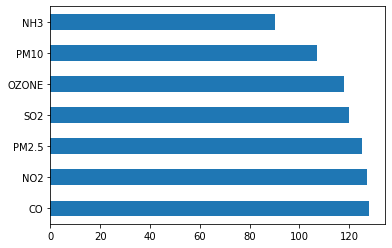

In [48]:
pollutant_data["Pollutants"].value_counts().plot(kind='barh')

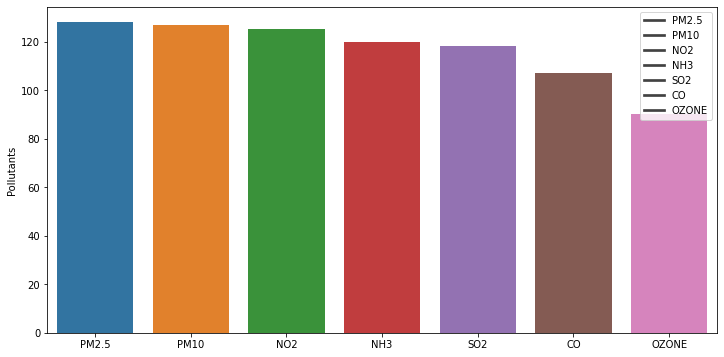

In [49]:
plt.figure(figsize=(12,6))
labels=pollutant_data["Pollutants"].unique()
sns.barplot(x=pollutant_data["Pollutants"].unique(),
           y=pollutant_data["Pollutants"].value_counts(),data=pollutant_data,palette='tab10')
plt.legend(labels)
plt.show()

In [50]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [51]:
pollutant_data.head(5)

Country           State       city                           place  \
0   India  Andhra_Pradesh  Amaravati  Secretariat, Amaravati - APPCB   
1   India  Andhra_Pradesh  Amaravati  Secretariat, Amaravati - APPCB   
2   India  Andhra_Pradesh  Amaravati  Secretariat, Amaravati - APPCB   
3   India  Andhra_Pradesh  Amaravati  Secretariat, Amaravati - APPCB   
4   India  Andhra_Pradesh  Amaravati  Secretariat, Amaravati - APPCB   

            lastupdate   Avg    Max   Min Pollutants  
0  21-12-2018 03:00:00  70.0  108.0  42.0      PM2.5  
1  21-12-2018 03:00:00  76.0  102.0  43.0       PM10  
2  21-12-2018 03:00:00  73.0  118.0  46.0        NO2  
3  21-12-2018 03:00:00   5.0    6.0   4.0        NH3  
4  21-12-2018 03:00:00  41.0  109.0   2.0        SO2

In [52]:
pollutant_data.groupby(by="Pollutants")["Max","Min"].agg('max')

C:\Users\Siddhartha-PC\AppData\Local\Temp\ipykernel_19056\3743865752.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



Max         Min
Pollutants                        
CO          198.000000  106.000000
NH3         195.892704   80.339056
NO2         305.000000  108.000000
OZONE       266.000000   64.000000
PM10        394.500000  124.500000
PM2.5       394.500000  124.500000
SO2         195.892704   80.339056

In [53]:
pollutant_data.groupby(by=["State","city","Pollutants"])["Max","Min"].agg('max')

C:\Users\Siddhartha-PC\AppData\Local\Temp\ipykernel_19056\2943084958.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



Max         Min
State          city               Pollutants                        
Andhra_Pradesh Amaravati          CO          102.000000   18.000000
                                  NH3           6.000000    4.000000
                                  NO2         118.000000   46.000000
                                  OZONE        35.000000   12.000000
                                  PM10        102.000000   43.000000
                                  PM2.5       108.000000   42.000000
                                  SO2         109.000000    2.000000
               Rajamahendravaram  CO          103.000000    2.000000
                                  NH3         116.500000   26.500000
                                  NO2         116.500000   26.500000
                                  OZONE       130.000000   51.000000
                                  PM10        116.500000   26.500000
                                  PM2.5       116.500000   26.500000
                                  SO2         116.500000   26.500000
               Tirupati           CO           25.000000    6.000000
                                  NH3           3.000000    2.000000
                                  NO2          89.000000   36.000000
                                  OZONE        58.000000   27.000000
                                  PM10         83.000000   40.000000
                                  PM2.5        72.000000   28.000000
                                  SO2          12.000000    6.000000
               Vijayawada         CO           78.000000   34.000000
                                  NH3           3.000000    2.000000
                                  NO2          18.000000   13.000000
                                  PM10         74.000000   50.000000
                                  PM2.5        73.000000   32.000000
                                  SO2          23.000000   11.000000
               Visakhapatnam      NH3           4.000000    2.000000
                                  NO2          81.000000   13.000000
                                  OZONE        81.000000   39.000000
                                  PM10        101.000000   54.000000
                                  PM2.5        96.000000   53.000000
                                  SO2          13.000000    2.000000
Bihar          Gaya               CO          115.000000    7.000000
                                  NO2          15.000000   10.000000
                                  OZONE        74.000000   27.000000
                                  PM2.5       394.500000  124.500000
                                  SO2          26.000000    4.000000
               Muzaffarpur        CO          111.000000    2.000000
                                  NO2          68.000000   20.000000
                                  OZONE       132.000000   32.000000
                                  PM2.5       394.500000  124.500000
                                  SO2          98.000000   12.000000
               Patna              CO          148.000000   71.000000
                                  NO2          22.000000   11.000000
                                  PM2.5       394.500000  124.500000
                                  SO2          47.000000   20.000000
Delhi          Delhi              CO          198.000000  100.000000
                                  NH3         195.892704   80.339056
                                  NO2         305.000000   80.339056
                                  OZONE       185.000000   51.000000
                                  PM10        394.500000  124.500000
                                  PM2.5       394.500000  124.500000
                                  SO2         195.892704   80.339056
Gujarat        Ahmedabad          CO           46.000000   16.000000
                                  NO2         188.000000   37.000000
                                  PM2.5       337.0

In [54]:
pollutant_data[pollutant_data.State=="West_Bengal"].groupby(by=["city","Pollutants"])["Max","Min"].agg('max')

C:\Users\Siddhartha-PC\AppData\Local\Temp\ipykernel_19056\1571918355.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



Max    Min
city     Pollutants              
Asanol   CO          107.0   11.0
         NH3           7.0    1.0
         NO2         107.0   38.0
         OZONE        66.0    1.0
         PM10        364.0  124.5
         PM2.5       350.0  124.5
         SO2          51.0    1.0
Durgapur CO          105.0   33.0
         PM10        249.0   92.0
         SO2          20.0    8.0
Haldia   CO           34.0   14.0
         NO2          81.0   26.0
         OZONE        33.0    4.0
         PM10        190.0   93.0
         SO2          20.0    9.0
Howrah   CO          148.0   21.0
         NH3          12.0    5.0
         NO2         180.0   63.0
         OZONE       163.0    2.0
         PM10        394.5  124.5
         PM2.5       394.5  124.5
         SO2         132.0   16.0
Kolkata  CO          134.0   27.0
         NH3          56.0    6.0
         NO2         158.0   47.0
         OZONE       154.0    4.0
         PM10        394.5  124.5
         PM2.5       394.5  124.5
         SO2          34.0    6.0
Siliguri CO           67.0   14.0
         NH3          13.0    2.0
         NO2          83.0   14.0
         OZONE        65.0    7.0
         PM10        178.0   45.0
         PM2.5       297.0   44.0
         SO2           8.0    2.0

C:\Users\Siddhartha-PC\AppData\Local\Temp\ipykernel_19056\3794330269.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



<AxesSubplot:xlabel='city,Pollutants'>

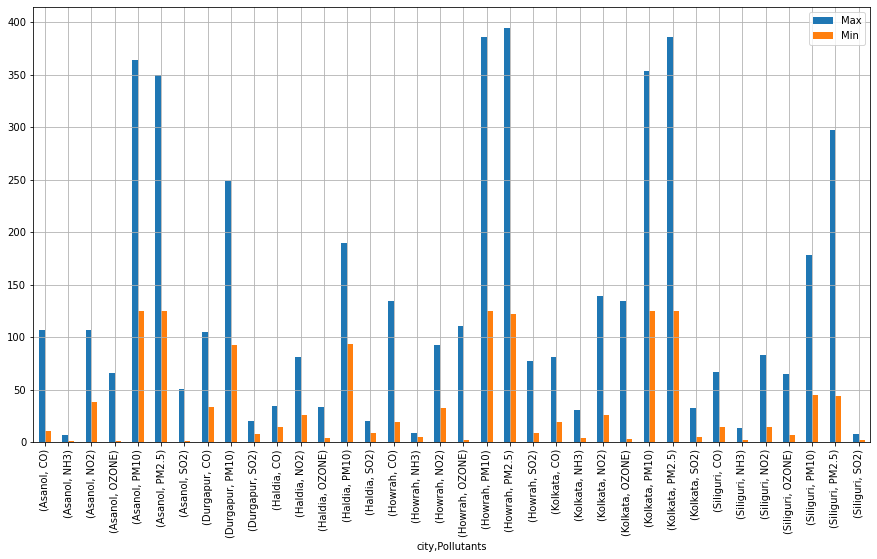

In [55]:
pollutant_data[pollutant_data.State=="West_Bengal"].groupby(by=["city","Pollutants"])["Max","Min"].agg('mean').plot(kind="bar",
                                                                                                                grid=True,figsize=(15,8))

In [56]:
pollutant_data[pollutant_data.State=="Uttar_Pradesh"].groupby(by=["city","Pollutants"])["Max","Min"].agg('mean')

C:\Users\Siddhartha-PC\AppData\Local\Temp\ipykernel_19056\3535864308.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



Max         Min
city          Pollutants                        
Agra          CO          128.000000   34.000000
              NO2         149.000000   34.000000
              OZONE         2.000000    1.000000
              PM2.5       394.500000  124.500000
              SO2          32.000000    1.000000
Baghpat       CO           56.000000    8.000000
              NH3          31.000000   17.000000
              NO2          84.000000   31.000000
              OZONE       221.000000    4.000000
              PM10        394.500000  124.500000
              PM2.5       394.500000  124.500000
              SO2          58.000000   14.000000
Bulandshahr   CO          114.000000   39.000000
              NH3          28.000000   11.000000
              NO2         163.000000   66.000000
              OZONE       192.000000    5.000000
              PM10        394.500000  124.500000
              PM2.5       394.500000  124.500000
              SO2          59.000000   16.000000
Ghaziabad     CO          136.000000   47.000000
              NH3          20.000000   14.000000
              NO2         175.000000  108.000000
              OZONE       100.000000    6.000000
              PM10        394.500000  124.500000
              PM2.5       394.500000  124.500000
              SO2          84.000000   13.000000
Greater_Noida CO          131.000000   22.000000
              NH3          23.000000    9.000000
              NO2         255.000000   75.000000
              OZONE       119.000000    2.000000
              PM10        394.500000  124.500000
              PM2.5       394.500000  124.500000
              SO2          37.000000    1.000000
Kanpur        CO          155.000000   10.000000
              NO2         205.000000   62.000000
              OZONE       121.000000    3.000000
              PM2.5       394.500000  124.500000
              SO2         112.000000   10.000000
Lucknow       CO          106.250000   13.500000
              NH3          18.000000    8.000000
              NO2         112.250000   30.500000
              OZONE        72.333333   12.666667
              PM2.5       385.750000  124.500000
              SO2          15.500000    6.250000
Moradabad     CO          125.000000   19.000000
              NH3          17.000000    7.000000
              NO2         211.000000   45.000000
              OZONE       151.000000    3.000000
              PM10        394.500000  114.000000
              PM2.5       394.500000   55.000000
              SO2          36.000000    7.000000
Muzaffarnagar CO           96.000000   29.000000
              NH3          28.000000   12.000000
              NO2         112.000000   40.000000
              OZONE       116.000000   32.000000
              PM10        388.000000  124.500000
              PM2.5       394.500000  124.500000
              SO2          42.000000    1.000000
Noida         CO          139.500000   42.000000
              NH3          19.000000    9.000000
              NO2         123.500000   24.500000
              OZONE        61.000000   13.000000
              PM10        394.500000  124.500000
              PM2.5       394.500000  124.500000
              SO2          48.000000    3.000000
Varanasi      CO          112.000000   14.000000
              NO2         270.000000   98.000000
              OZONE       197.000000    4.000000
              PM10        394.500000  124.500000
              PM2.5       394.500000  124.500000
              SO2          57.000000    7.000000

C:\Users\Siddhartha-PC\AppData\Local\Temp\ipykernel_19056\2463150713.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



<AxesSubplot:xlabel='city,Pollutants'>

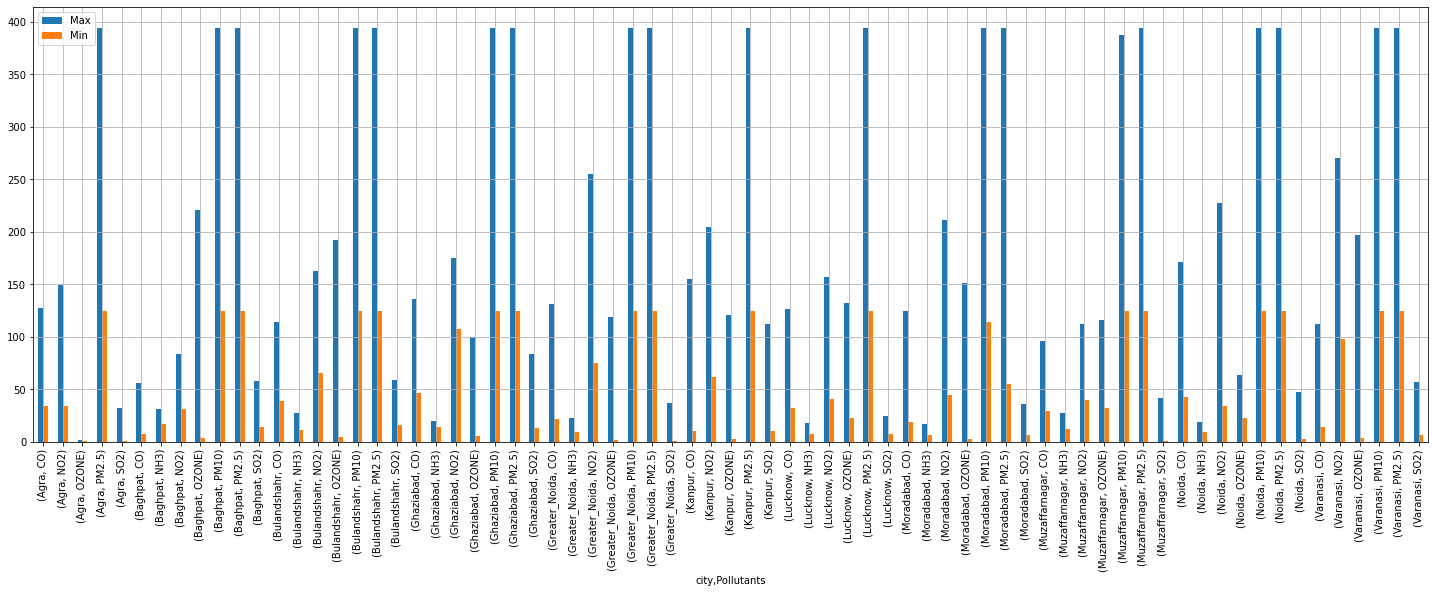

In [57]:
pollutant_data[pollutant_data.State=="Uttar_Pradesh"].groupby(by=["city","Pollutants"])["Max","Min"].agg('max').plot(kind="bar",
                                                                                                                grid=True,figsize=(25,8))

In [58]:
import warnings
warnings.filterwarnings("ignore")

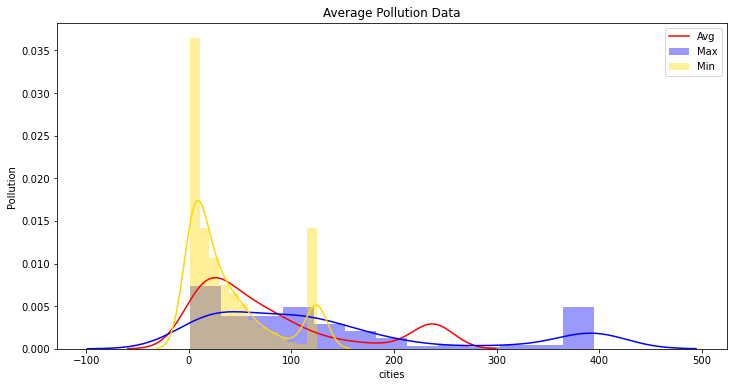

In [59]:
plt.figure(figsize=(12,6))
sns.distplot(pollutant_data['Avg'],hist=False,color="red",label="Avg")
sns.distplot(pollutant_data['Max'],hist=True,color="blue",label="Max")
sns.distplot(pollutant_data['Min'],hist=True,color="gold",label="Min")
plt.xlabel('cities')
plt.ylabel('Pollution')
plt.legend()
plt.title('Average Pollution Data')
plt.show()

## Checking which State have most Pollution

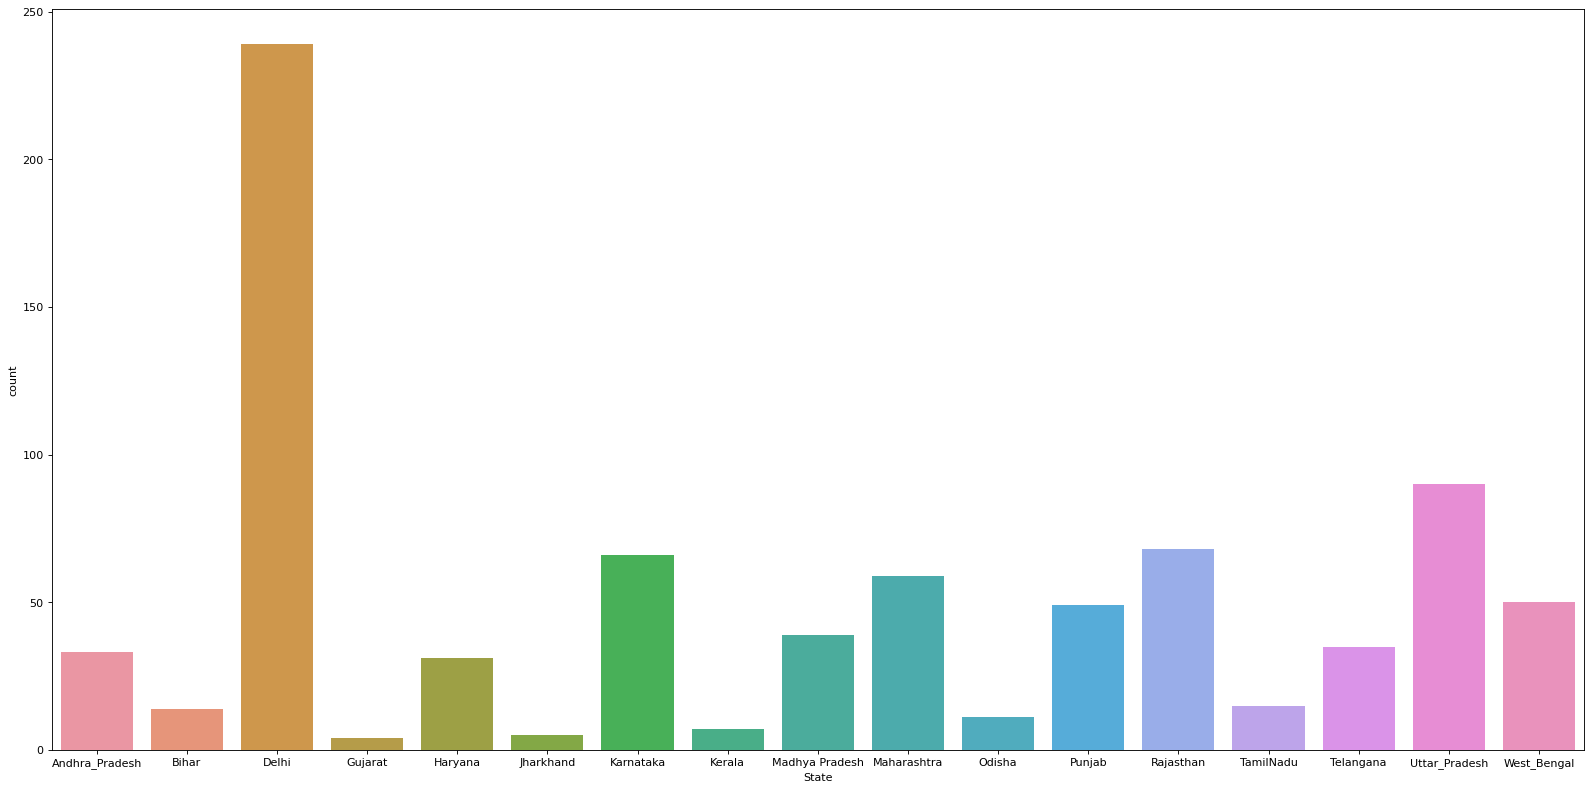

In [60]:
plt.figure(figsize=(20,10), dpi = 80)
sns.countplot(x='State',data=pollutant_data)
plt.xlabel('State')
plt.tight_layout()

## Plotting Min,Max and Avg Pollution (Pollutant wise)


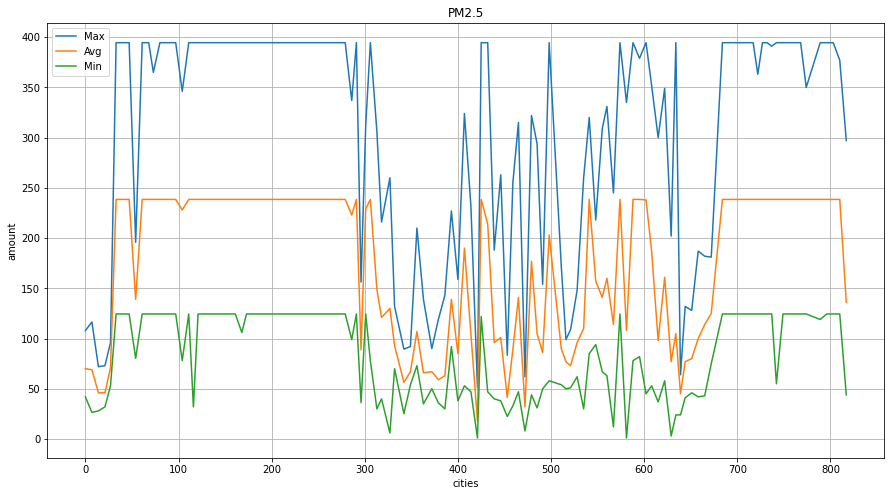

In [61]:
data_p1=pollutant_data[pollutant_data.Pollutants=='PM2.5']
data_p1[['Max','Avg','Min']].plot(grid=True,figsize=(15,8))
plt.xlabel('cities')
plt.ylabel('amount')
plt.title('PM2.5')
plt.show()

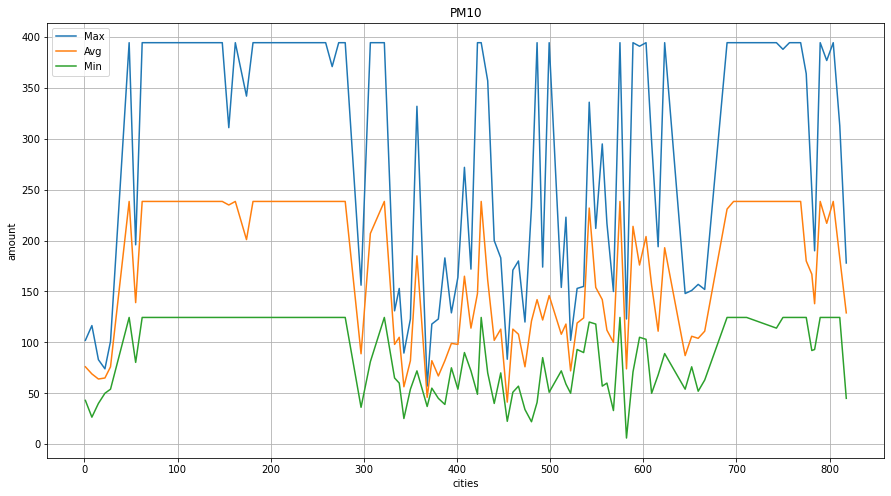

In [62]:
data_p1=pollutant_data[pollutant_data.Pollutants=='PM10']
data_p1[['Max','Avg','Min']].plot(grid=True,figsize=(15,8))
plt.xlabel('cities')
plt.ylabel('amount')
plt.title('PM10')
plt.show()

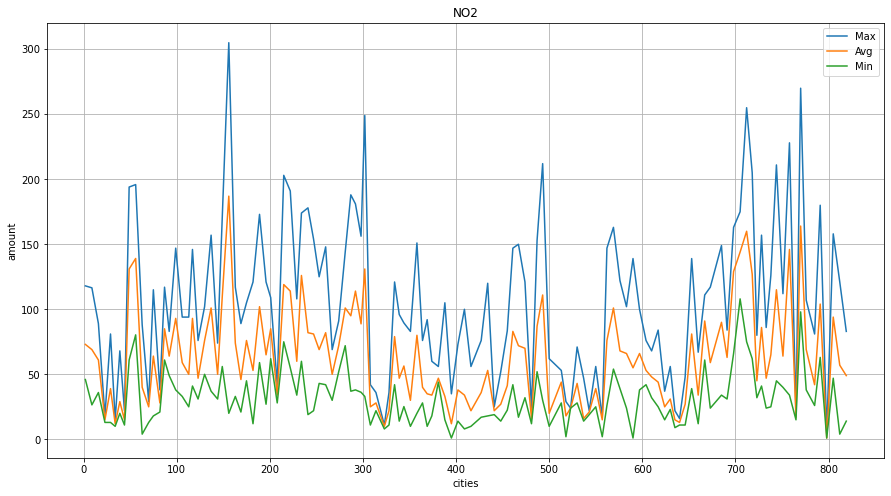

In [63]:
data_p1=pollutant_data[pollutant_data.Pollutants=='NO2']
data_p1[['Max','Avg','Min']].plot(grid=True,figsize=(15,8))
plt.xlabel('cities')
plt.ylabel('amount')
plt.title('NO2')
plt.show()

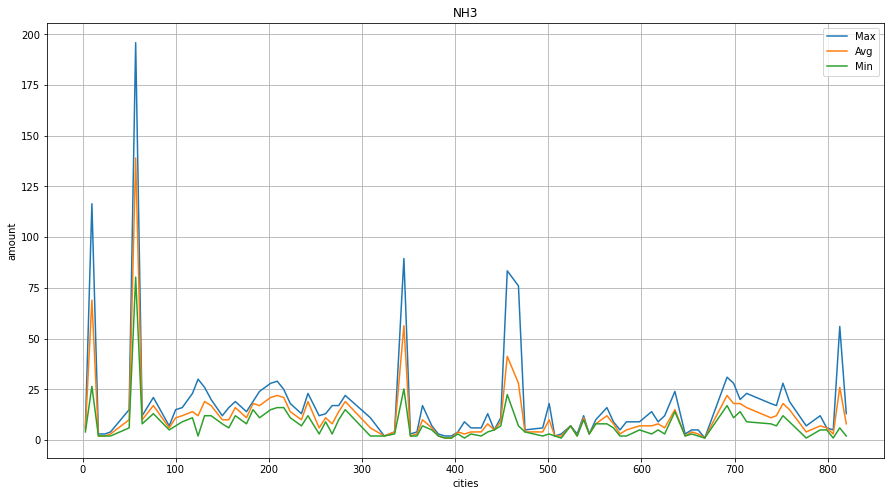

In [64]:
data_p1=pollutant_data[pollutant_data.Pollutants=='NH3']
data_p1[['Max','Avg','Min']].plot(grid=True,figsize=(15,8))
plt.xlabel('cities')
plt.ylabel('amount')
plt.title('NH3')
plt.show()

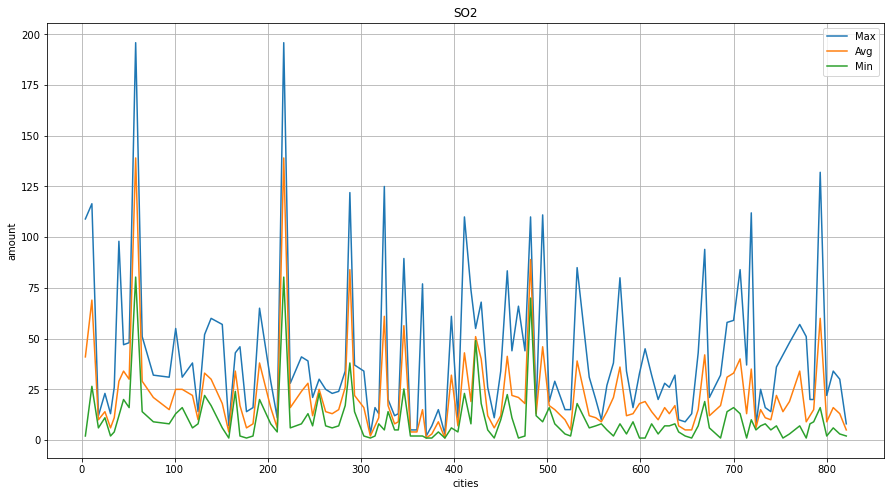

In [65]:
data_p1=pollutant_data[pollutant_data.Pollutants=='SO2']
data_p1[['Max','Avg','Min']].plot(grid=True,figsize=(15,8))
plt.xlabel('cities')
plt.ylabel('amount')
plt.title('SO2')
plt.show()

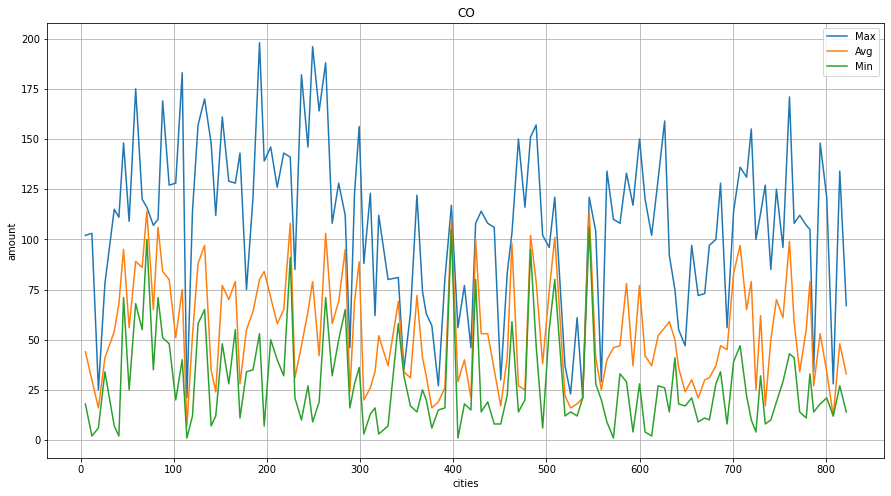

In [66]:
data_p1=pollutant_data[pollutant_data.Pollutants=='CO']
data_p1[['Max','Avg','Min']].plot(grid=True,figsize=(15,8))
plt.xlabel('cities')
plt.ylabel('amount')
plt.title('CO')
plt.show()

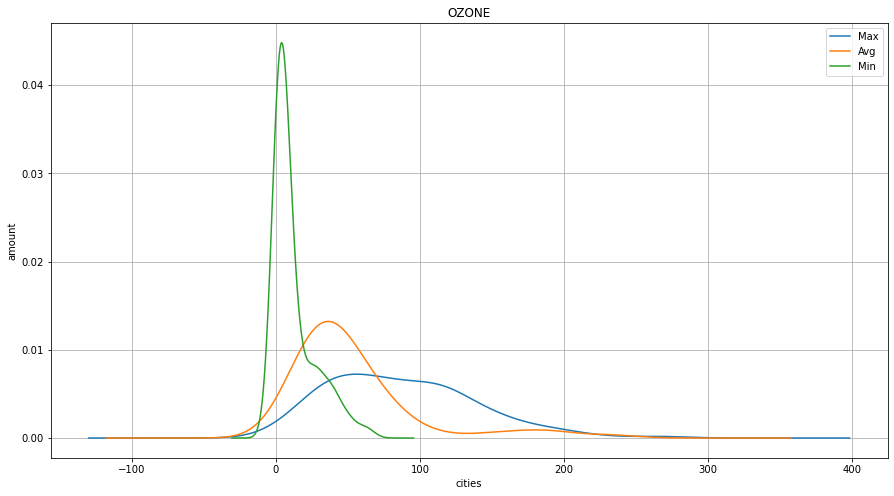

In [67]:
data_p1=pollutant_data[pollutant_data.Pollutants=='OZONE']
data_p1[['Max','Avg','Min']].plot(kind='density',grid=True,figsize=(15,8))
plt.xlabel('cities')
plt.ylabel('amount')
plt.title('OZONE')
plt.show()

## Plotting Min,Max And Avg (State wise)

Text(0.5, 1.0, 'Andhra_Pradesh')

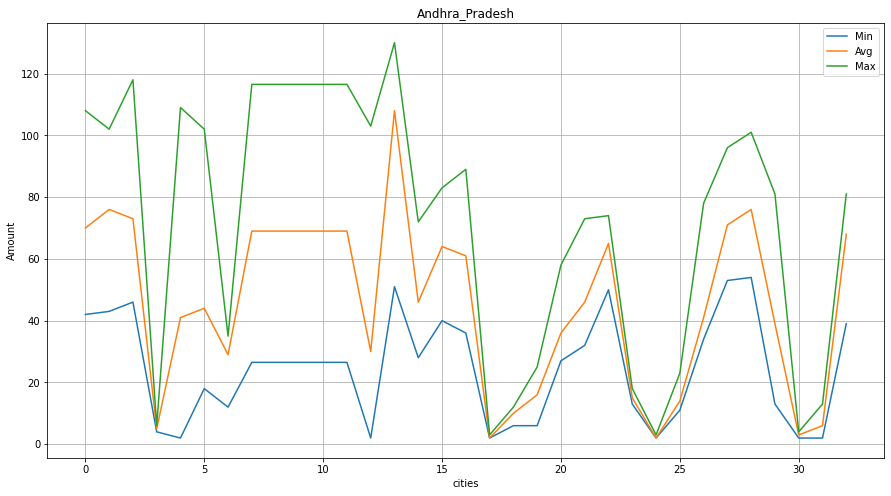

In [68]:
data_state1=pollutant_data[pollutant_data.State=='Andhra_Pradesh']
data_state1[['Min','Avg','Max']].plot(grid=True,figsize=(15,8))
plt.xlabel('cities')
plt.ylabel('Amount')
plt.title('Andhra_Pradesh')

Text(0.5, 1.0, 'Delhi')

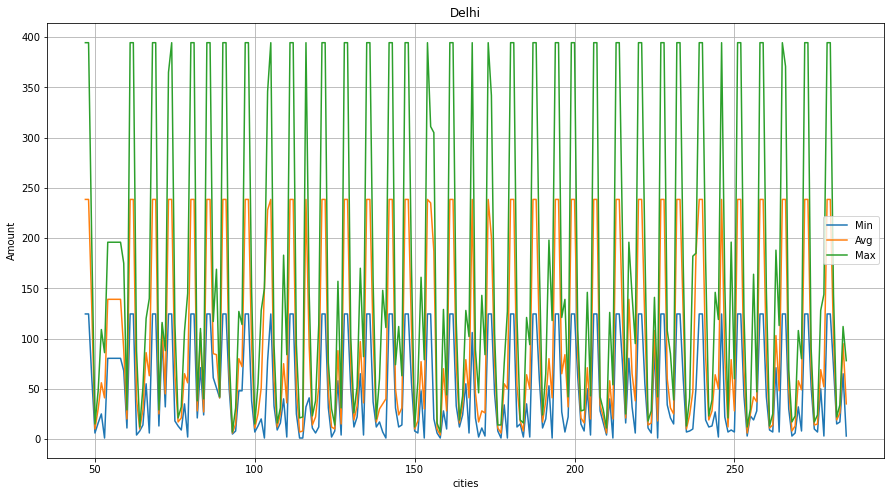

In [69]:
data_state1=pollutant_data[pollutant_data.State=='Delhi']
data_state1[['Min','Avg','Max']].plot(grid=True,figsize=(15,8))
plt.xlabel('cities')
plt.ylabel('Amount')
plt.title('Delhi')

Text(0.5, 1.0, 'Jharkhand')

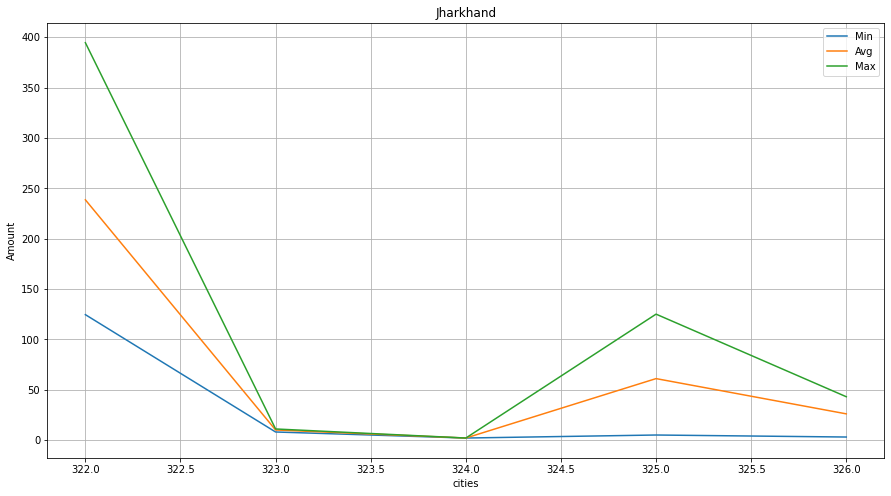

In [70]:
data_state1=pollutant_data[pollutant_data.State=='Jharkhand']
data_state1[['Min','Avg','Max']].plot(grid=True,figsize=(15,8))
plt.xlabel('cities')
plt.ylabel('Amount')
plt.title('Jharkhand')

## Plotting Mean Pollutant Amount

In [71]:
data_pollu=pollutant_data.groupby('Pollutants').mean()
data_pollu

Avg         Max        Min
Pollutants                                   
CO           54.211607  107.879911  28.458036
NH3          12.363796   18.503688   7.671768
NO2          63.279856  106.468755  30.926450
OZONE        53.256780   87.272881  12.052542
PM10        172.425623  289.668523  90.468777
PM2.5       177.448333  305.132255  83.569273
SO2          22.506788   42.435205  10.273318

Text(0.5, 1.0, 'Pollutant Amounts')

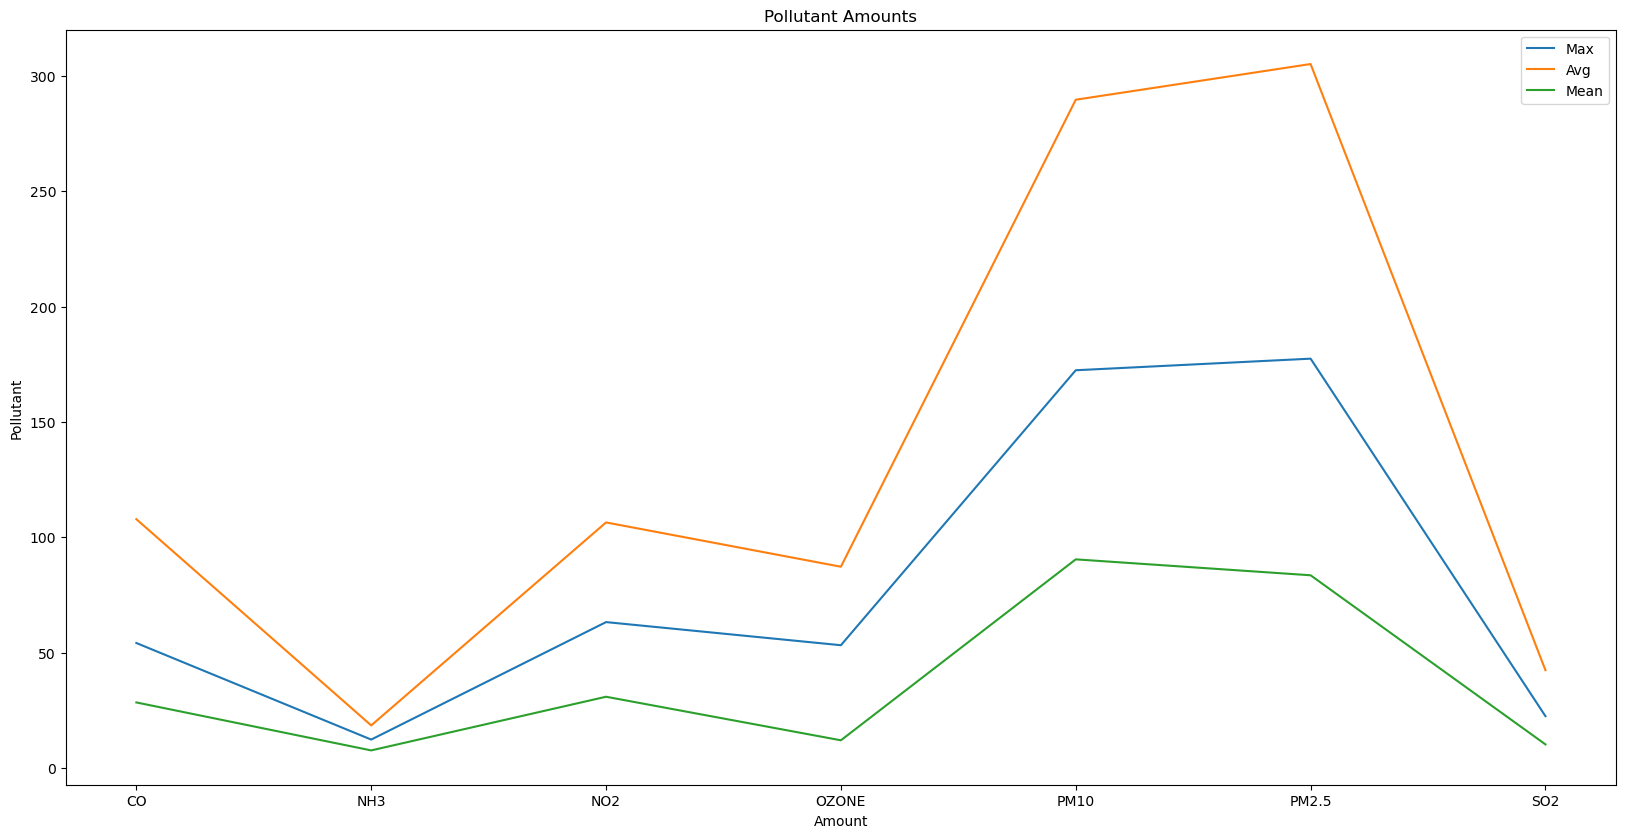

In [72]:

data_pollu=pollutant_data.groupby('Pollutants')
data_pollu.mean()
plt.figure(figsize=(20,10) , dpi=100)
plt.plot(data_pollu.mean())
plt.legend(['Max','Avg','Mean'])
plt.xlabel('Amount')
plt.ylabel('Pollutant')
plt.title('Pollutant Amounts')

## Plotting Mean State Pollution


In [73]:
data_states=pollutant_data.groupby('State')
data_states.mean()

Avg         Max        Min
State                                            
Andhra_Pradesh   45.515152   72.196970  24.318182
Bihar            84.250000  145.678571  42.107143
Delhi           104.972543  176.411532  53.046169
Gujarat         106.500000  173.250000  47.500000
Haryana          76.645161  137.693548  28.709677
Jharkhand        67.500000  115.100000  28.500000
Karnataka        51.263862   84.978079  23.908446
Kerala           67.000000   97.857143  44.000000
Madhya Pradesh   74.025641  135.794872  31.807692
Maharashtra      60.774818  117.560533  26.111380
Odisha           54.727273  106.272727  26.181818
Punjab           55.908163   89.102041  32.795918
Rajasthan        76.132353  148.654412  27.970588
TamilNadu        36.333333   77.366667  15.200000
Telangana        48.457143   85.228571  23.057143
Uttar_Pradesh   104.961111  176.361111  47.855556
West_Bengal      85.270000  144.310000  38.870000

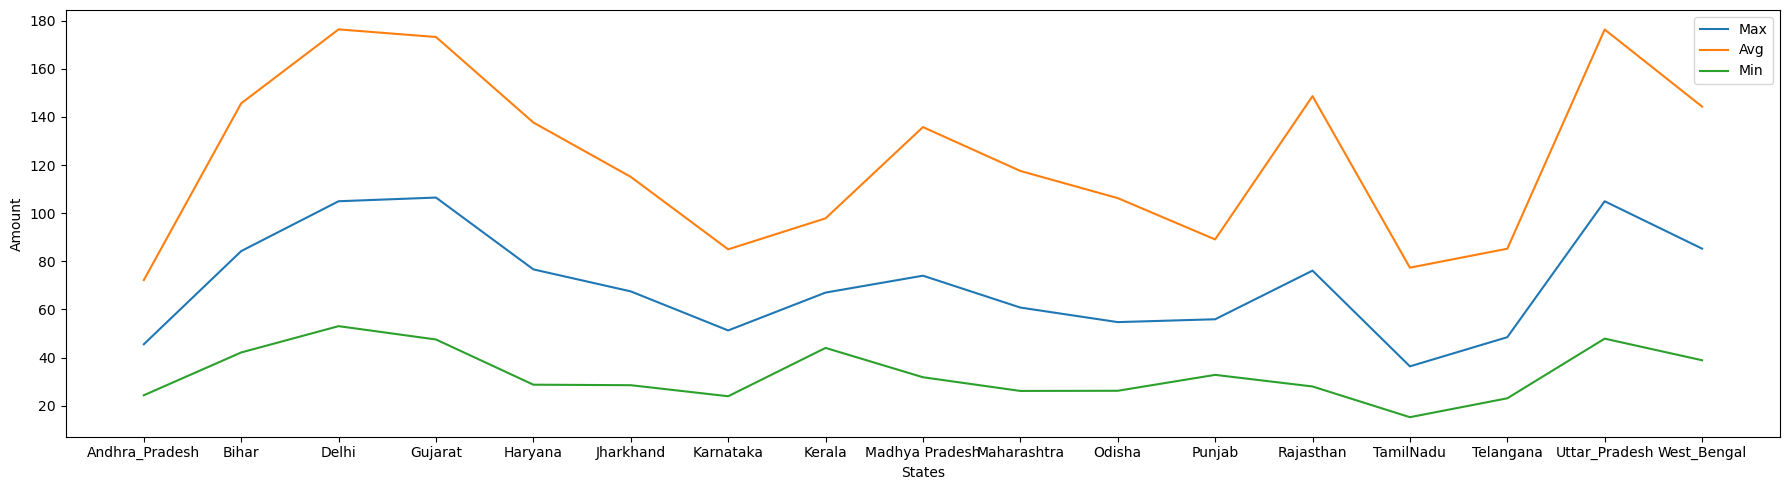

In [74]:
plt.figure(figsize=(18,5) , dpi=100)
plt.plot(data_states.mean())
plt.legend(['Max','Avg','Min'])
plt.xlabel('States')
plt.ylabel('Amount')
plt.tight_layout()

## Plotting mean City Pollution


In [75]:
data_city=pollutant_data.groupby('city')
data_city.mean()

Avg         Max        Min
city                                                 
Agra                 78.700000  141.100000  38.900000
Ahmedabad           106.500000  173.250000  47.500000
Ajmer                67.428571  141.428571  25.714286
Alwar                62.571429  114.857143  16.714286
Amaravati            48.285714   82.857143  23.857143
Amritsar             51.600000   82.400000  33.200000
Asanol               84.214286  150.285714  43.000000
Aurangabad           47.142857   91.000000  16.571429
Baghpat             121.642857  177.000000  46.142857
Bathinda             49.000000   80.600000  25.200000
Bengaluru            55.854133   89.510638  25.191489
Bhiwadi              95.000000  166.714286  47.428571
Brajrajnagar         68.000000  143.000000  28.142857
Bulandshahr         132.857143  192.142857  55.142857
Chandrapur           41.285714   83.428571  22.428571
Chennai              36.333333   77.366667  15.200000
Chikkaballapur       32.000000   53.142857  23.285714
Delhi               104.972543  176.411532  53.046169
Dewas                54.428571   89.428571  25.428571
Durgapur             86.000000  124.666667  44.333333
Faridabad            99.300000  164.700000  41.100000
Gaya                 74.300000  124.900000  34.500000
Ghaziabad           116.714286  186.285714  62.428571
Greater_Noida       111.142857  193.428571  51.142857
Gurugram             88.800000  156.200000  35.250000
Haldia               48.400000   71.600000  29.200000
Howrah               99.892857  171.964286  44.750000
Hubballi             36.428571   83.142857  15.000000
Hyderabad            48.457143   85.228571  23.057143
Jaipur               81.450000  157.950000  24.850000
Jalandhar            29.857143   44.428571  21.285714
Jodhpur             103.833333  189.833333  42.500000
Jorapokhar           67.500000  115.100000  28.500000
Kanpur              111.100000  197.500000  41.900000
Khanna               46.000000   75.571429  30.857143
Kolkata              98.750000  165.214286  43.500000
Kota                 68.000000  130.571429  21.857143
Lucknow              77.400000  135.700000  37.250000
Ludhiana             51.166667   88.000000  28.166667
Mandi Gobindgarh     91.214286  124.857143  49.285714
Mandideep            78.571429  143.285714  31.714286
Manesar              76.357143  146.142857  26.714286
Moradabad           108.714286  189.857143  35.714286
Mumbai               74.833333  130.500000  38.833333
Muzaffarnagar       101.571429  168.071429  51.857143
Muzaffarpur          85.100000  160.700000  38.100000
Nagpur               63.714286  142.285714  23.000000
Nashik               57.857143   92.571429  15.285714
Noida               113.666667  191.083333  55.750000
Pali                 52.571429  118.142857  24.142857
Panchkula            50.600000   97.000000  18.000000
Patiala              61.142857   92.714286  40.285714
Patna                95.625000  152.875000  56.625000
Pithampur            53.714286  100.428571  27.714286
Pune                 86.000000  142.000000  42.333333
Rajamahendravaram    69.000000  116.500000  26.500000
Rohtak               51.000000   93.750000  13.750000
Rupnagar             66.400000  132.000000  30.800000
Satna                79.250000  152.125000  44.750000
Siliguri             56.142857  101.571429  18.285714
Singrauli            96.285714  169.000000  43.357143
Solapur              78.333333  181.583333  32.500000
Talcher              31.500000   42.000000  22.750000
Thane                61.857143  120.857143  26.142857
Thiruvananthapuram   67.000000   97.857143  44.000000
Tirupati             33.571429   48.857143  20.714286
Udaipur              72.285714  158.357143  28.428571
Ujjain               84.142857  167.500000  23.428571
Varanasi            122.833333  237.500000  62.000000
Vijayawada           30.500000   44.833333  23.666667
Visakhapatnam        43.833333   62.666667  27.166667

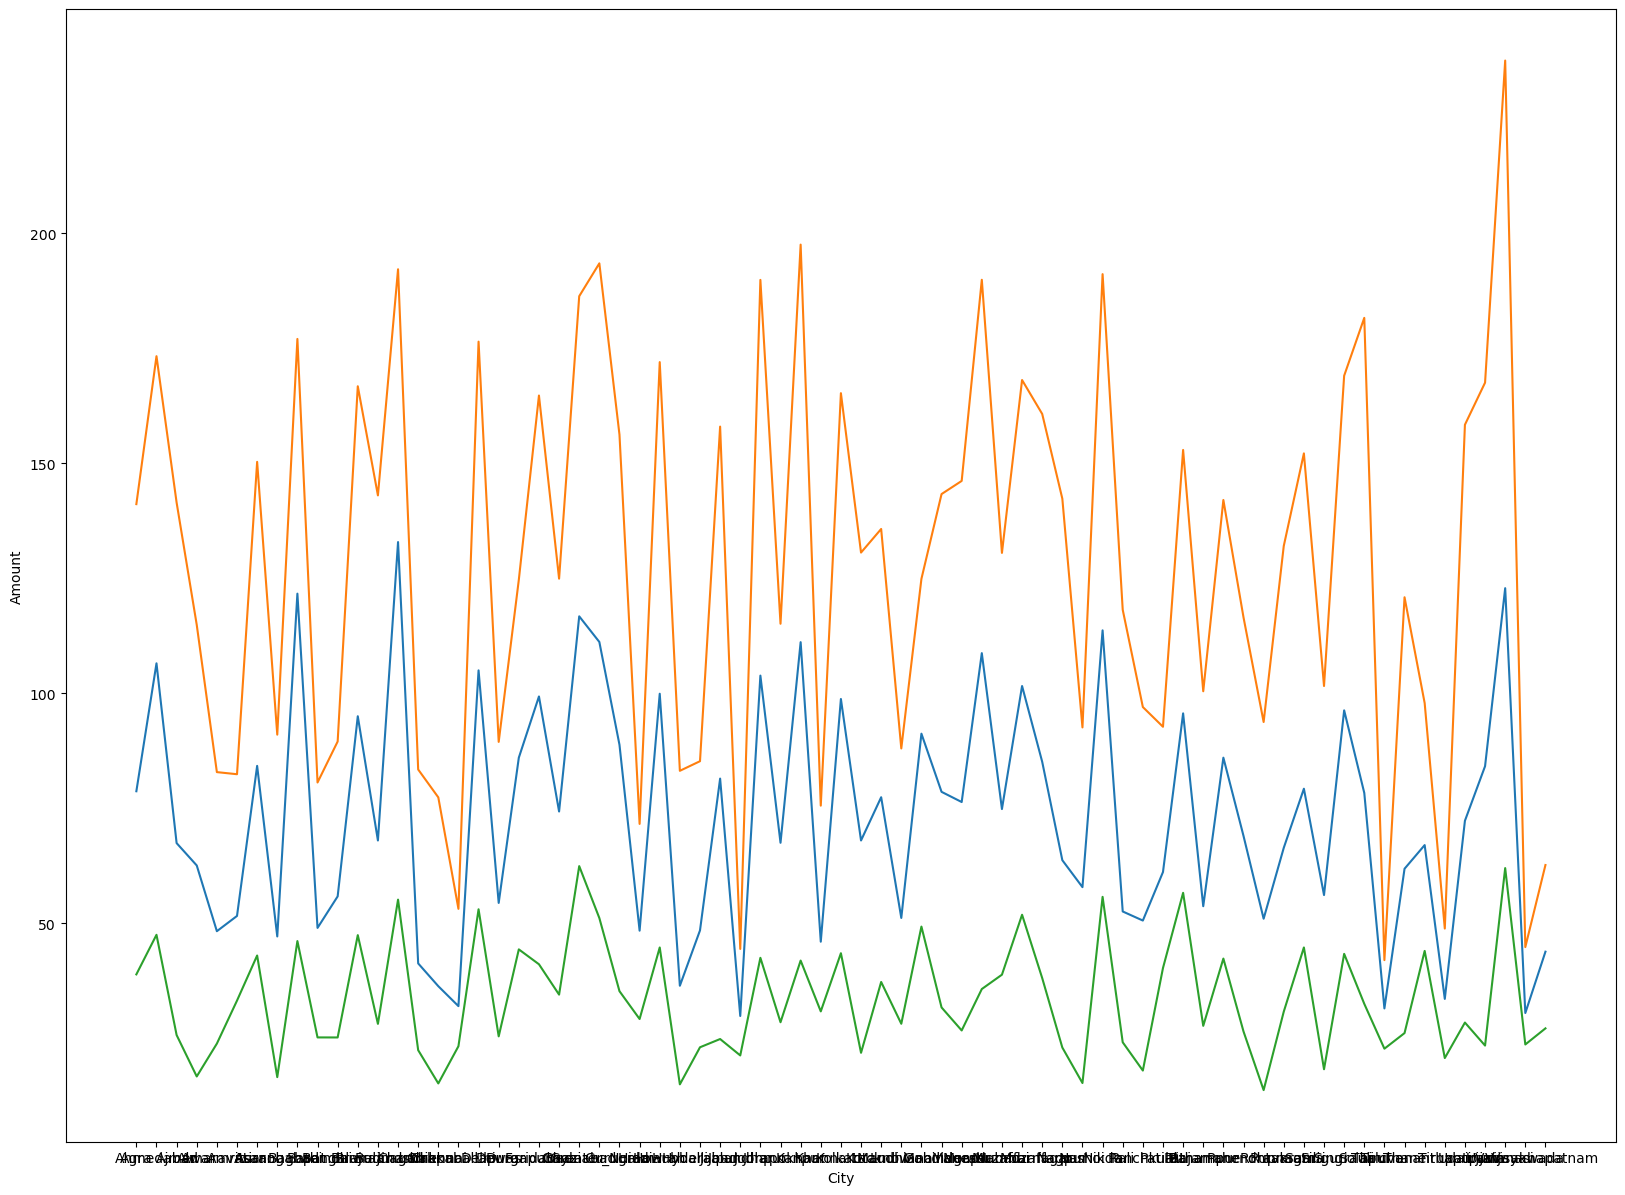

In [76]:
plt.figure(figsize=(20,15) , dpi=100)
plt.plot(data_city.mean())
plt.xlabel('City')
plt.ylabel('Amount')
plt.show()

<Figure size 2000x1500 with 0 Axes>

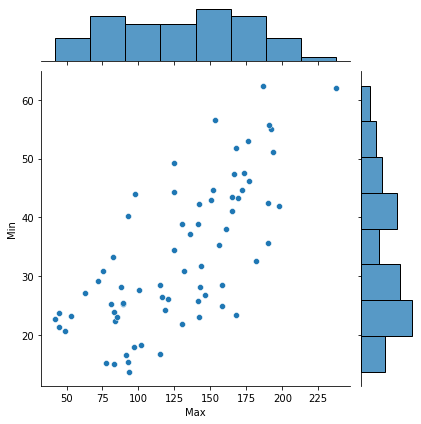

In [77]:
plt.figure(figsize=(20,15) , dpi=100)
sns.jointplot(pollutant_data.groupby('city')["Max"].mean(),pollutant_data.groupby('city')["Min"].mean(),palette="husl")
plt.xlabel('City')
plt.ylabel('Amount')
plt.show()

In [78]:
import plotly.graph_objects as go
import numpy as np

N = pollutant_data.city.nunique()
fig = go.Figure(data=go.Scattergl(
    x = pollutant_data.groupby('city')["Max"].mean(), # non-uniform distribution
    y = pollutant_data.groupby('city')["Min"].mean(), # zoom to see more points at the center
    mode='markers',
    marker=dict(
        color=np.random.randn(N),
        colorscale='Viridis',
        line_width=1,showscale=True,size=10
    )
))

fig.show()

In [79]:
pollutant_data.head(5)

Country           State       city                           place  \
0   India  Andhra_Pradesh  Amaravati  Secretariat, Amaravati - APPCB   
1   India  Andhra_Pradesh  Amaravati  Secretariat, Amaravati - APPCB   
2   India  Andhra_Pradesh  Amaravati  Secretariat, Amaravati - APPCB   
3   India  Andhra_Pradesh  Amaravati  Secretariat, Amaravati - APPCB   
4   India  Andhra_Pradesh  Amaravati  Secretariat, Amaravati - APPCB   

            lastupdate   Avg    Max   Min Pollutants  
0  21-12-2018 03:00:00  70.0  108.0  42.0      PM2.5  
1  21-12-2018 03:00:00  76.0  102.0  43.0       PM10  
2  21-12-2018 03:00:00  73.0  118.0  46.0        NO2  
3  21-12-2018 03:00:00   5.0    6.0   4.0        NH3  
4  21-12-2018 03:00:00  41.0  109.0   2.0        SO2

In [80]:
pollutant_data=pollutant_data.drop(columns=["Country","place","lastupdate"],axis=1)
pollutant_data.head(5)

State       city   Avg    Max   Min Pollutants
0  Andhra_Pradesh  Amaravati  70.0  108.0  42.0      PM2.5
1  Andhra_Pradesh  Amaravati  76.0  102.0  43.0       PM10
2  Andhra_Pradesh  Amaravati  73.0  118.0  46.0        NO2
3  Andhra_Pradesh  Amaravati   5.0    6.0   4.0        NH3
4  Andhra_Pradesh  Amaravati  41.0  109.0   2.0        SO2

In [81]:
from sklearn.preprocessing import StandardScaler,LabelEncoder

In [82]:
le_encoder=LabelEncoder()

In [83]:
pollutant_data["State"]=le_encoder.fit_transform(pollutant_data["State"])
pollutant_data["city"]=le_encoder.fit_transform(pollutant_data["city"])


In [84]:
dummy=pd.get_dummies(pollutant_data["Pollutants"])

In [85]:
pollutant_data=pd.concat([pollutant_data,dummy],axis=1)
pollutant_data.head(5)

State  city   Avg    Max   Min Pollutants  CO  NH3  NO2  OZONE  PM10  \
0      0     4  70.0  108.0  42.0      PM2.5   0    0    0      0     0   
1      0     4  76.0  102.0  43.0       PM10   0    0    0      0     1   
2      0     4  73.0  118.0  46.0        NO2   0    0    1      0     0   
3      0     4   5.0    6.0   4.0        NH3   0    1    0      0     0   
4      0     4  41.0  109.0   2.0        SO2   0    0    0      0     0   

   PM2.5  SO2  
0      1    0  
1      0    0  
2      0    0  
3      0    0  
4      0    1

In [86]:
pollutant_data=pollutant_data.drop(columns=["Pollutants"],axis=1)
pollutant_data.head(5)

State  city   Avg    Max   Min  CO  NH3  NO2  OZONE  PM10  PM2.5  SO2
0      0     4  70.0  108.0  42.0   0    0    0      0     0      1    0
1      0     4  76.0  102.0  43.0   0    0    0      0     1      0    0
2      0     4  73.0  118.0  46.0   0    0    1      0     0      0    0
3      0     4   5.0    6.0   4.0   0    1    0      0     0      0    0
4      0     4  41.0  109.0   2.0   0    0    0      0     0      0    1

In [87]:
X=pollutant_data.drop(columns=["Avg"],axis=1)
y=pollutant_data["Avg"]

In [88]:
from sklearn.model_selection import train_test_split,GridSearchCV,KFold,cross_val_score

In [89]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [90]:
X_train.shape,y_train.shape

((570, 11), (570,))

In [91]:
X_test.shape,y_test.shape

((245, 11), (245,))

In [92]:
from sklearn.ensemble import ExtraTreesRegressor,RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

In [94]:
from sklearn.metrics import r2_score,accuracy_score,mean_absolute_error,mean_squared_error,mean_absolute_percentage_error 

## Model Building

In [93]:
xgb_reg=XGBRegressor(n_estimators=150,max_depth=5,learning_rate=0.05,booster="gbtree")
rf_reg=RandomForestRegressor(n_estimators=100,criterion='squared_error',max_depth=None,max_features='auto')
adb_reg=AdaBoostRegressor(n_estimators=100,)
dt_reg=DecisionTreeRegressor(criterion='squared_error',splitter='best',max_depth=5,max_features="auto")

In [102]:
xgb_reg=XGBRegressor(n_estimators=150,max_depth=7,learning_rate=0.05,booster="gbtree")
xgb_reg.fit(X_train,y_train)
y_train_pred=xgb_reg.predict(X_train)
y_test_pred=xgb_reg.predict(X_test)
print("Train Accuracy:\n",r2_score(y_train,y_train_pred))
print("---------------------------------------------------")
print("Test Accuracy:\n",r2_score(y_test,y_test_pred))
print("---------------------------------------------------")

print("Mean_absolute_error:\n",mean_absolute_error(y_train,y_train_pred))

print("Mean_squared_error:\n",mean_squared_error(y_train,y_train_pred))
print("Mean_absolute_percentage_error:\n",mean_absolute_percentage_error(y_train,y_train_pred))

Train Accuracy:
 0.9994423498507621
---------------------------------------------------
Test Accuracy:
 0.9551497077132266
---------------------------------------------------
Mean_absolute_error:
 1.217717143378396
Mean_squared_error:
 3.366980329460837
Mean_absolute_percentage_error:
 0.03816431301830735


In [106]:
rf_reg=RandomForestRegressor(n_estimators=100,criterion='squared_error',max_depth=8,max_features='auto')
rf_reg.fit(X_train,y_train)
y_train_pred=rf_reg.predict(X_train)
y_test_pred=rf_reg.predict(X_test)
print("Train Accuracy:\n",r2_score(y_train,y_train_pred))
print("---------------------------------------------------")
print("Test Accuracy:\n",r2_score(y_test,y_test_pred))
print("---------------------------------------------------")

print("Mean_absolute_error:\n",mean_absolute_error(y_train,y_train_pred))

print("Mean_squared_error:\n",mean_squared_error(y_train,y_train_pred))
print("Mean_absolute_percentage_error:\n",mean_absolute_percentage_error(y_train,y_train_pred))

Train Accuracy:
 0.9934063377960606
---------------------------------------------------
Test Accuracy:
 0.9607453293770714
---------------------------------------------------
Mean_absolute_error:
 3.657020167473902
Mean_squared_error:
 39.81121671017522
Mean_absolute_percentage_error:
 0.08450734224858761


In [112]:
import pickle
from pickle import dump,load

In [113]:
#dump(rf_reg,open("Random_Forest_Reg.pkl","wb"))

In [114]:
loaded_model=load(open("Random_Forest_Reg.pkl","rb"))

In [116]:
y_pred=loaded_model.predict(X_test)

In [117]:
print("Test Accuracy:\n",r2_score(y_test,y_pred))
print("---------------------------------------------------")

print("Mean_absolute_error:\n",mean_absolute_error(y_test,y_pred))

print("Mean_squared_error:\n",mean_squared_error(y_test,y_pred))
print("Mean_absolute_percentage_error:\n",mean_absolute_percentage_error(y_test,y_pred))

Test Accuracy:
 0.9607453293770714
---------------------------------------------------
Mean_absolute_error:
 7.82750423136655
Mean_squared_error:
 226.93567885995785
Mean_absolute_percentage_error:
 0.1498686414624197


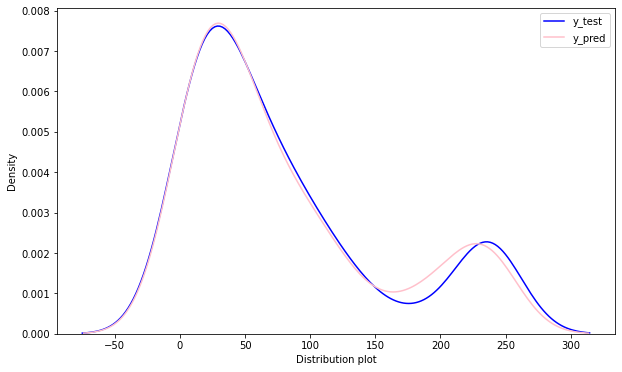

In [126]:
plt.figure(figsize=(10,6))
sns.distplot(y_test,hist=False,label="y_test",color='blue')
sns.distplot(y_pred,hist=False,label="y_pred",color='pink')
plt.legend()
plt.xlabel("Distribution plot")
plt.show()